# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [7]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a_k=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b_k=y_k-a_k*x_k$

***Przykład***


# This is a polynomial of order <built-in function ord>.
# This is a polynomial of order <built-in function ord>.


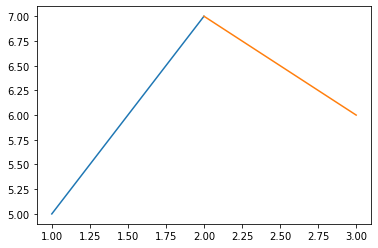

In [2]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 


***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 5, 10, 15, 20, 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 


***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

wprowadzimy następujące zmienne:

$b_0 = y_k$

$b_1 = d_k - \frac{h_k}{6}(2m_k+m_{k+1})$

$b_2 = \frac{m_k}{2}$

$b_3 = \frac{m_{k+1}-m_k}{6h_k}$

gdzie:

$h_k = x_{k+1} - x_k$

$d_k = y_{k+1} - y_k$

$m_k = 3\frac{d_k-d_{k-1}}{h_{k-1}+h_k} - \frac{m_{k-1}*\rho_k}{2}-\frac{m_{k+1}*\lambda_k}{2}$

$\lambda_k = \frac{h_k}{h_{k-1}+h_k}$

$\rho_k = \frac{h_{k-1}}{h_{k-1}+h_k}$

dzieki temi współczynniki możemy wyznaczyć w następującyu sposób:

$a_3 = b_3$

$a_2 = b_2 - 3*b_3*x_k$

$a_1 = b1 - 2*b_2*x_k + 3*b_3*x_k*x_k$

$a_0 = b_0 - b_1*x_k + b_2*x_k*x_k - b_3*x_k*x_k*x_k$

Do wyznaczenia $m_0$ oraz $m_n$ wykorzystujemy metodę ograniczeń naturalnych i przyjmujemy te wartości jako zerowe.
Jako wektor $m_k$ przyjmij początkowo zera np.zeros.

***Przykład***

# This is a polynomial of order <built-in function ord>.
# This is a polynomial of order <built-in function ord>.


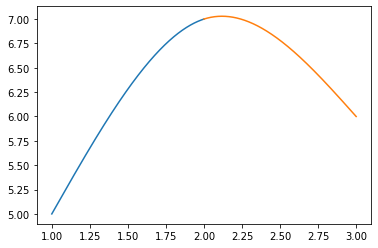

In [3]:
x=np.array([1,2,3])
y=np.array([5,7,6])


a0,a1,a2,a3 = main.cubic_spline(x,y)
f = [[a0[i],a1[i],a2[i],a3[i]] for i in range(len(a))]


for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 


***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

dla różnych ilości wartości węzłów: 50, 100, 1000

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.
Sprawdź czas wykonywania się poszczególnych elementów oraz ilość pamięci użytej 


***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 dla różnych ilości wartości węzłów: 50, 100, 1000 oraz przedstawić wyniki na odpowiednich wykresach.

